In [1]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split
from keras import optimizers
from sklearn.datasets import fetch_openml
from keras.utils import to_categorical
from keras.models import Sequential
from keras.layers import Dense
from keras.datasets import fashion_mnist
from keras.callbacks import History
from keras.regularizers import l2
from keras.regularizers import l1
from keras.regularizers import l1_l2
from keras.layers import Dropout
import time
import warnings
warnings.filterwarnings("ignore")

In [2]:
(X_train2,y_train2),(X_test2, y_test2) = fashion_mnist.load_data()

4422102/4422102 [==============================] - 0s 0us/step


In [3]:
X_train2 = X_train2.reshape(X_train2.shape[0], 28*28)
X_test2 = X_test2.reshape(X_test2.shape[0], 28*28)
X_train2 = X_train2/255
X_test2 = X_test2/255

In [4]:
labels = ["T-shirt/top","Pantalone","Pullover","Vestito","Cappotto","Sandalo","Maglietta","Sneaker","Borsa","Stivaletto"]

y_train_dummy2 = to_categorical(y_train2, 10)
y_test_dummy2 = to_categorical(y_test2, 10)

# Utilizzando la regolarizzazione L2

In [6]:
model = Sequential()
model.add(Dense(512, activation='relu', input_dim=X_train2.shape[1], kernel_regularizer=l2(0.01)))
model.add(Dense(256, activation='relu', kernel_regularizer=l2(0.01)))
model.add(Dense(128, activation='relu'))
model.add(Dense(10, activation='softmax'))
adam = optimizers.Adam()
model.compile(loss='categorical_crossentropy', optimizer=adam, metrics=['accuracy'])
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 512)               401920    
                                                                 
 dense_1 (Dense)             (None, 256)               131328    
                                                                 
 dense_2 (Dense)             (None, 128)               32896     
                                                                 
 dense_3 (Dense)             (None, 10)                1290      
                                                                 
Total params: 567434 (2.16 MB)
Trainable params: 567434 (2.16 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [8]:
model.fit(X_train2, y_train_dummy2, epochs=35, batch_size=512)

Epoch 1/35
118/118 [==============================] - 4s 34ms/step - loss: 0.3997 - accuracy: 0.8831
Epoch 2/35
118/118 [==============================] - 5s 44ms/step - loss: 0.4002 - accuracy: 0.8820
Epoch 3/35
118/118 [==============================] - 4s 33ms/step - loss: 0.3991 - accuracy: 0.8820
Epoch 4/35
118/118 [==============================] - 4s 33ms/step - loss: 0.4015 - accuracy: 0.8825
Epoch 5/35
118/118 [==============================] - 5s 44ms/step - loss: 0.3952 - accuracy: 0.8848
Epoch 6/35
118/118 [==============================] - 4s 34ms/step - loss: 0.3879 - accuracy: 0.8851
Epoch 7/35
118/118 [==============================] - 4s 38ms/step - loss: 0.3915 - accuracy: 0.8844
Epoch 8/35
118/118 [==============================] - 5s 46ms/step - loss: 0.3870 - accuracy: 0.8865
Epoch 9/35
118/118 [==============================] - 4s 35ms/step - loss: 0.3845 - accuracy: 0.8869
Epoch 10/35
118/118 [==============================] - 4s 36ms/step - loss: 0.3831 - accura

In [9]:
model.evaluate(X_test2, y_test_dummy2)

313/313 [==============================] - 2s 6ms/step - loss: 0.4323 - accuracy: 0.8660


[0.43234506249427795, 0.8659999966621399]

# Utilizzando la regolarizzazione L1

In [10]:
model = Sequential()
model.add(Dense(512, activation='relu', input_dim=X_train2.shape[1], kernel_regularizer=l1(0.01)))
model.add(Dense(256, activation='relu', kernel_regularizer=l1(0.01)))
model.add(Dense(128, activation='relu'))
model.add(Dense(10, activation='softmax'))
adam = optimizers.Adam()
model.compile(loss='categorical_crossentropy', optimizer=adam, metrics=['accuracy'])
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_4 (Dense)             (None, 512)               401920    
                                                                 
 dense_5 (Dense)             (None, 256)               131328    
                                                                 
 dense_6 (Dense)             (None, 128)               32896     
                                                                 
 dense_7 (Dense)             (None, 10)                1290      
                                                                 
Total params: 567434 (2.16 MB)
Trainable params: 567434 (2.16 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [11]:
model.fit(X_train2, y_train_dummy2, epochs=35, batch_size=512)

Epoch 1/35
118/118 [==============================] - 5s 34ms/step - loss: 45.7937 - accuracy: 0.5812
Epoch 2/35
118/118 [==============================] - 5s 45ms/step - loss: 1.8419 - accuracy: 0.6915
Epoch 3/35
118/118 [==============================] - 4s 34ms/step - loss: 1.6731 - accuracy: 0.7295
Epoch 4/35
118/118 [==============================] - 4s 34ms/step - loss: 1.5981 - accuracy: 0.7467
Epoch 5/35
118/118 [==============================] - 5s 44ms/step - loss: 1.5634 - accuracy: 0.7570
Epoch 6/35
118/118 [==============================] - 4s 34ms/step - loss: 1.5092 - accuracy: 0.7689
Epoch 7/35
118/118 [==============================] - 4s 34ms/step - loss: 1.4797 - accuracy: 0.7742
Epoch 8/35
118/118 [==============================] - 5s 45ms/step - loss: 1.4532 - accuracy: 0.7802
Epoch 9/35
118/118 [==============================] - 4s 34ms/step - loss: 1.4285 - accuracy: 0.7856
Epoch 10/35
118/118 [==============================] - 4s 34ms/step - loss: 1.4106 - accur

In [12]:
model.evaluate(X_test2, y_test_dummy2)

313/313 [==============================] - 3s 7ms/step - loss: 1.3037 - accuracy: 0.8040


[1.303669810295105, 0.8040000200271606]

Decisamente peggiore dei risultati con regolarizzazione L2, in media è sempre la più performante dei due (la L2)

# Regolarizzazione L1 + L2


In [13]:
model = Sequential()
model.add(Dense(512, activation='relu', input_dim=X_train2.shape[1], kernel_regularizer=l1_l2(l1=0.0001, l2=0.001)))
model.add(Dense(256, activation='relu', kernel_regularizer=l1_l2(l1=0.0001, l2=0.001)))
model.add(Dense(128, activation='relu'))
model.add(Dense(10, activation='softmax'))
adam = optimizers.Adam()
model.compile(loss='categorical_crossentropy', optimizer=adam, metrics=['accuracy'])
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_8 (Dense)             (None, 512)               401920    
                                                                 
 dense_9 (Dense)             (None, 256)               131328    
                                                                 
 dense_10 (Dense)            (None, 128)               32896     
                                                                 
 dense_11 (Dense)            (None, 10)                1290      
                                                                 
Total params: 567434 (2.16 MB)
Trainable params: 567434 (2.16 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [14]:
model.fit(X_train2, y_train_dummy2, epochs=35, batch_size=512)

Epoch 1/35
118/118 [==============================] - 6s 39ms/step - loss: 2.3941 - accuracy: 0.7877
Epoch 2/35
118/118 [==============================] - 5s 40ms/step - loss: 1.3524 - accuracy: 0.8471
Epoch 3/35
118/118 [==============================] - 5s 43ms/step - loss: 1.0400 - accuracy: 0.8495
Epoch 4/35
118/118 [==============================] - 5s 42ms/step - loss: 0.8449 - accuracy: 0.8585
Epoch 5/35
118/118 [==============================] - 6s 50ms/step - loss: 0.7306 - accuracy: 0.8623
Epoch 6/35
118/118 [==============================] - 4s 35ms/step - loss: 0.6473 - accuracy: 0.8668
Epoch 7/35
118/118 [==============================] - 4s 35ms/step - loss: 0.6003 - accuracy: 0.8668
Epoch 8/35
118/118 [==============================] - 5s 46ms/step - loss: 0.5555 - accuracy: 0.8715
Epoch 9/35
118/118 [==============================] - 4s 36ms/step - loss: 0.5173 - accuracy: 0.8755
Epoch 10/35
118/118 [==============================] - 4s 36ms/step - loss: 0.4920 - accura

In [15]:
model.evaluate(X_test2, y_test_dummy2)

313/313 [==============================] - 3s 8ms/step - loss: 0.4643 - accuracy: 0.8620


[0.46427011489868164, 0.8619999885559082]

Insieme alla L2 è la migliore


# Dropout

Utilizziamo un ulteriore tecnica di regolarizzazione che è il dropout.

In [23]:
model = Sequential()
model.add(Dense(512, activation='relu', input_dim=X_train2.shape[1]))
model.add(Dropout(0.5))
model.add(Dense(256, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(128, activation='relu'))
model.add(Dense(10, activation='softmax'))
adam = optimizers.Adam()
model.compile(loss='categorical_crossentropy', optimizer=adam, metrics=['accuracy'])
model.summary()

Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_36 (Dense)            (None, 512)               401920    
                                                                 
 dropout_24 (Dropout)        (None, 512)               0         
                                                                 
 dense_37 (Dense)            (None, 256)               131328    
                                                                 
 dropout_25 (Dropout)        (None, 256)               0         
                                                                 
 dense_38 (Dense)            (None, 128)               32896     
                                                                 
 dense_39 (Dense)            (None, 10)                1290      
                                                                 
Total params: 567434 (2.16 MB)
Trainable params: 56743

In [24]:
model.fit(X_train2, y_train_dummy2, epochs=35, batch_size=512)

Epoch 1/35
118/118 [==============================] - 2s 10ms/step - loss: 0.7732 - accuracy: 0.7173
Epoch 2/35
118/118 [==============================] - 1s 10ms/step - loss: 0.4899 - accuracy: 0.8233
Epoch 3/35
118/118 [==============================] - 1s 10ms/step - loss: 0.4394 - accuracy: 0.8418
Epoch 4/35
118/118 [==============================] - 1s 10ms/step - loss: 0.4126 - accuracy: 0.8508
Epoch 5/35
118/118 [==============================] - 1s 10ms/step - loss: 0.3949 - accuracy: 0.8575
Epoch 6/35
118/118 [==============================] - 1s 10ms/step - loss: 0.3773 - accuracy: 0.8623
Epoch 7/35
118/118 [==============================] - 1s 10ms/step - loss: 0.3707 - accuracy: 0.8666
Epoch 8/35
118/118 [==============================] - 1s 10ms/step - loss: 0.3597 - accuracy: 0.8692
Epoch 9/35
118/118 [==============================] - 1s 10ms/step - loss: 0.3509 - accuracy: 0.8710
Epoch 10/35
118/118 [==============================] - 1s 10ms/step - loss: 0.3479 - accura

In [25]:
model.evaluate(X_test2, y_test_dummy2)

313/313 [==============================] - 1s 2ms/step - loss: 0.3106 - accuracy: 0.8882


[0.3106207251548767, 0.8881999850273132]

Grazie al dropout le prestazioni sono notevolmente più alte e l'overfitting quasi ridotto al minimo

# Vero testing della rete neurale sui capi di abbigliamento

Adesso che abbiamo eliminato l'overfitting dalla nostra rete (o meglio, lo abbiamo limitato), proviamo a metterla all'opera cercando di identificare capi di abbigliamento, scarpe e accessori da immagini pescate in giro per il web, con la nostra rete neurale allenata sul fashion_MNIST. Per caricare un'immagine da un url remoto possiamo utilizzare il modulo skimage.

(-0.5, 413.5, 516.5, -0.5)

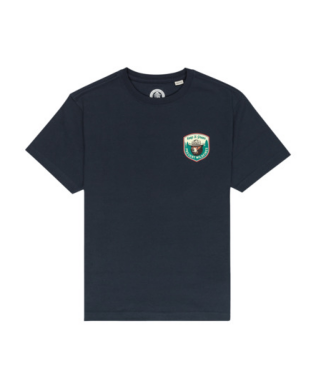

In [17]:
from skimage import io

url = "https://images.boardriders.com/global/element-products/all/default/large/elbzt00193_element,f_ecn_frt1.jpg"
image = io.imread(url)   # Legge e carica l'immagine all'interno della variabile image

plt.imshow(image)
plt.axis("off")

Prima di passare l'immagine alla rete neurale bisogna applicare le stesse trasformazioni (a quella appena caricata) applicate ai dati del fashion_MNIST utilizzate per allenare il modello

(-0.5, 27.5, 27.5, -0.5)

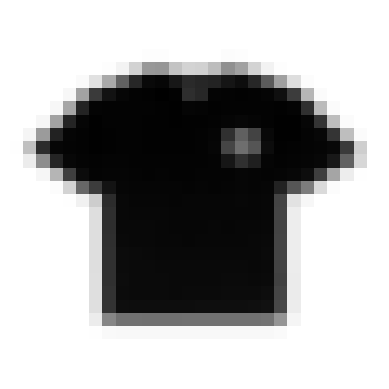

In [23]:
from skimage.transform import resize
from skimage.color import rgb2gray

image_res = resize(image, (28,28))
image_gray = rgb2gray(image_res)

#Codifichiamo ora la matrice dell'immagine all'interno di un singolo vettore
x = image_gray.reshape(1,28*28)
plt.imshow(x.reshape(28,28), cmap = "gray")
plt.axis("off")

Notiamo però una cosa

(-0.5, 27.5, 27.5, -0.5)

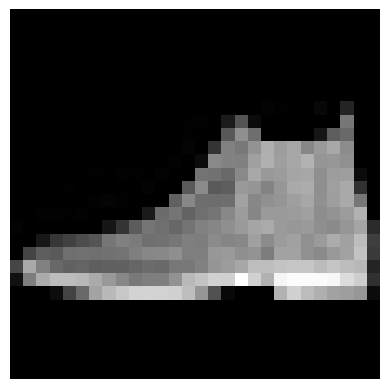

In [24]:
plt.imshow(X_test2[0].reshape(28,28), cmap = "gray")
plt.axis("off")

Lo sfondo delle immagini del fashion_MNIST è nero, mentre quello della nostra immagine è bianco. Essendo che la nostra rete si è allenata su un dataset con immagini con sfondo nero, caricando quella si confonderebbe. Dobbiamo allora invertire i colori

(-0.5, 27.5, 27.5, -0.5)

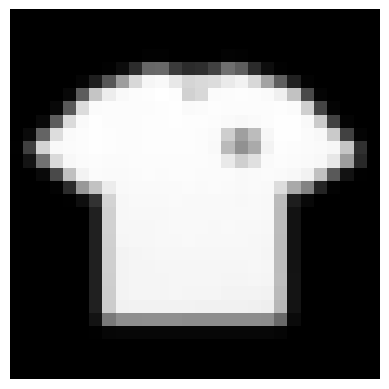

In [25]:
# Basta fare un operazione semplicissima:
x = 1. - x
plt.imshow(x.reshape(28,28), cmap = "gray")
plt.axis("off")

In [51]:
predictions = np.argmax(model.predict(x), axis=-1)
predictions

1/1 [==============================] - 0s 40ms/step


array([0])

Predizione giusta, ha indovinato che è una maglietta

(-0.5, 3149.5, 3497.5, -0.5)

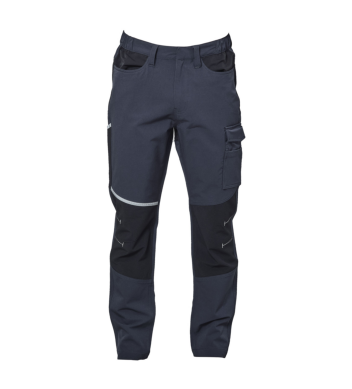

In [58]:
url2 = "https://www.jamesross.it/images/products/997700.jpg"
image2 = io.imread(url2)   # Legge e carica l'immagine all'interno della variabile image

plt.imshow(image2)
plt.axis("off")

(-0.5, 27.5, 27.5, -0.5)

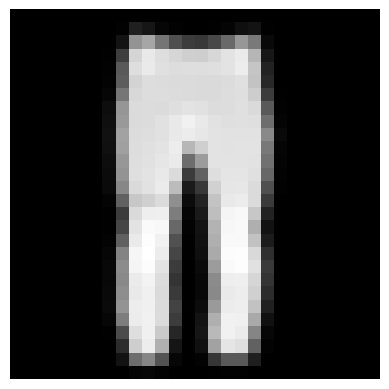

In [59]:
image_res2 = resize(image2, (28,28))
image_gray2 = rgb2gray(image_res2)

#Codifichiamo ora la matrice dell'immagine all'interno di un singolo vettore
x2 = image_gray2.reshape(1,28*28)

x2 = 1. - x2
plt.imshow(x2.reshape(28,28), cmap = "gray")
plt.axis("off")

In [64]:
predictions2 = np.argmax(model.predict(x2), axis=-1)
predictions2

1/1 [==============================] - 0s 54ms/step


array([1])

Anche questo catalogato correttamente